# Take the Leap!

Go to the [sign-up page](https://cloud.dwavesys.com/leap/signup/) of DWave Ocean SDK and fill the form. You will receive a confirmation email and then you are all set to [sign in](https://cloud.dwavesys.com/leap/login/).

Now you should be able to see a Dashboard with your **Trial Access Usage Summary**: this is the time you have FOR FREE on the quantum computer!

>&#9888;&#65039; **Attention:** You are on a trial plan: it provides a full minute of quantum computation for the period of the free trial (**1 month**).

On the left you can also find your account informations. The most important one is the **Solver API Token**

---
##### **Exercise 0**
Copy your API token (on the webpage click `COPY`) and paste it in the cell below next to the symbol `>`



In [1]:
# COPY HERE > DEV-434285c76c320541d7dd71d451bd8fb3b4bead07

---
Tokens are strings that allow Ocean to indentify us and verify we still have spare computational time in our account to run quantum commands.

You have limited computational time, use it wisely :)

## Install Ocean SDK

Install the kit that allows us to use DWave devices using the command `pip install dwave-ocean-sdk` (everything is guided in the cells).

The command `dwave config create` allows us to specify the token associated with our account (and our total computational time!). At the end of the installation you will be required to insert some infos: first, press enter for the profile (default), then paste one of the tokens in the following blank.

In [2]:
# try:
#   import google.colab
#   IN_COLAB = True
# except:
#   IN_COLAB = False

# if IN_COLAB:
  #!pip install dwave-ocean-sdk && dwave config create

In [3]:
# only on your local machine (not working in colab)

#!dwave install inspector

## Select a quantum machine

In [4]:
#!dwave ping



>&#9888;&#65039; **Attention:** Every time you want to work with DWave systems, you must check the availability of the quantum machines first.

Let's see which QPUs (Quantum or Hybrid solvers) are available right now...

In [6]:
from dwave.cloud import Client
with Client.from_config() as client:
  available_solvers = client.get_solvers()

for solver in available_solvers:
  print(solver)

BQMSolver(id='hybrid_binary_quadratic_model_version2')
DQMSolver(id='hybrid_discrete_quadratic_model_version1')
CQMSolver(id='hybrid_constrained_quadratic_model_version1')
StructuredSolver(id='Advantage2_prototype2.3')
StructuredSolver(id='Advantage_system6.4')
StructuredSolver(id='Advantage_system4.1')


The strings we just printed are the available DWave solvers. Some of them are hybrid (using also classical resources). We will focus on **purely quantum** ones.
In the following lines we select one available computer.

In [7]:
from dwave.cloud import Client
with Client.from_config() as client:
  solver = client.get_solver('Advantage_system6.4')   # SELECT THE SOLVER



Qubits are fragile, even a little bit of interference can ruin the quality of the qubits and consequently the quality of the computation.
Hence, qubits that are "not working" must be excluded from the computation.
Following lines will print the missing qubits and the values allowed for couplings and biases.

In [8]:
print('Missing qubits: ', end= ' ')
for i in range(solver.properties['num_qubits']):
  if i not in solver.properties['qubits']:
    print(i, end=' ')
print('\nh range: ', solver.properties['h_range'])
print('J range: ', solver.properties['j_range'])

Missing qubits:  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 104 119 616 727 742 771 1261 1450 1705 1905 1936 1996 2025 2850 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905 2906 2907 2908 2909 3042 3052 3069 3127 3204 3413 3422 3597 3852 4442 4666 4949 5207 5460 5685 5730 5731 5732 5733 5734 5735 5736 5737 5738 5739 5740 5741 5742 5743 5744 5745 5746 5747 5748 5749 5750 5751 5752 5753 5754 5755 5756 5757 5758 5759 
h range:  [-4.0, 4.0]
J range:  [-1.0, 1.0]


## Have a look at the QPU topology

As mentioned in the slides, the qubits of the QPU are connected as in a graph with a particular topology (~ aka "geometry").

Let's see how it looks like!

In [9]:
import dwave_networkx as dnx # contains the topologies of the dwave's quantum computers
import matplotlib.pyplot as plt

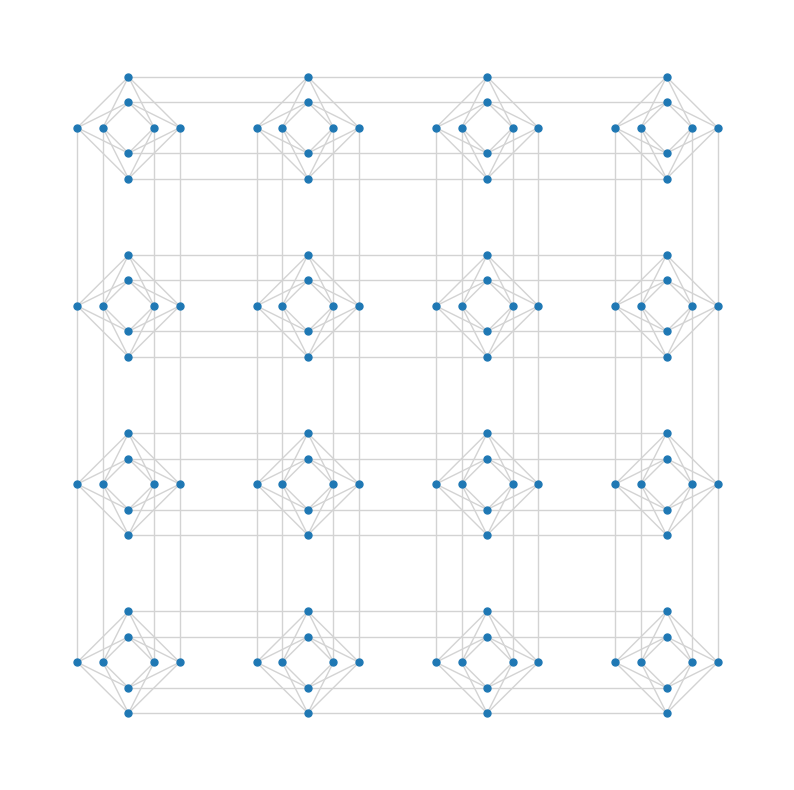

In [10]:
f, axes = plt.subplots(1, 1, figsize=(10,10))

# number of cells per side, each cell has 8 qubits
graph_size = 4

# The topology of the DWave 2000Q was the chimera graph
X = dnx.chimera_graph(graph_size)
dnx.draw_chimera(X, node_size=100/graph_size, edge_color='lightgrey', ax=axes)

plt.show()

##### **Exercise 1**
Plot the QPU topology of the Advantage system

> &#128161; **Hint:** Use the documentation.

> &#128161; **Hint:** The topology of the 2000Q QPU was "chimera", whereas the one of the Advantage was ...

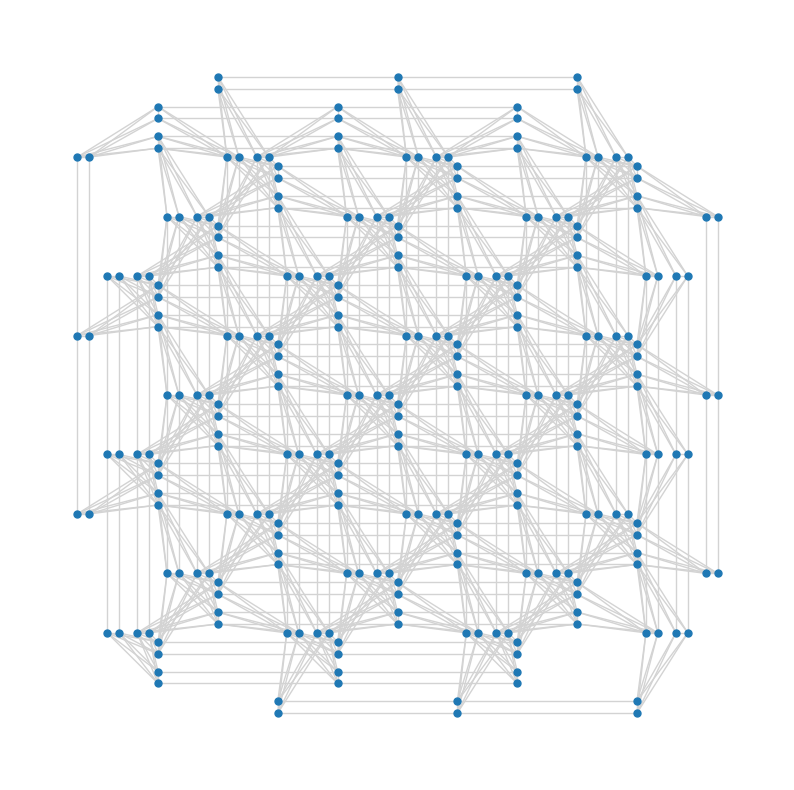

In [11]:
f, axes = plt.subplots(1, 1, figsize=(10,10))

# code here


# number of cells per side, each cell has 8 qubits
graph_size = 4

# The topology of the DWave 2000Q was the chimera graph
X = dnx.pegasus_graph(graph_size)
dnx.draw_pegasus(X, node_size=100/graph_size, edge_color='lightgrey', ax=axes)

plt.show()

## Quantum Annealing schedule

Thanks to DWave we have the schedule of the real annealing. Here is the code that shows the plot in the slides.

In [12]:
# mount google drive into colab
# from google.colab import drive

# drive.mount('/content/drive')

# import pandas as pd

# anneal_sc =  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lecture 3/Notebook/09-1273A-D_Advantage_system6_4_annealing_schedule.xlsx', 'processor-annealing-schedule')
# anneal_sc.head()

In [13]:
import pandas as pd
anneal_sc = pd.read_excel('09-1273A-D_Advantage_system6_4_annealing_schedule.xlsx', 
                          'processor-annealing-schedule')
anneal_sc.head()

s  A(s) (GHz)  B(s) (GHz)  C (normalized)
0  0.000000    9.626948    0.231671        0.000000
1  0.001001    9.536236    0.233863        0.005172
2  0.002002    9.448135    0.236065        0.010123
3  0.003003    9.360092    0.238278        0.015069
4  0.004004    9.272797    0.240501        0.019954

The energies are given in units of frequencies (GHz).

In order to convert them to joules (J) we need to multiply by the Planck constant
$$
h = 6.626 \cdot 10^{-34} \text{ J s}
$$
Note that we have GHz = $10^{9}\text{ Hz}$, hence

In [14]:
factor = 6.626e-25 ## 25 = (34-9)
factor

6.626e-25

In [15]:
anneal_sc['A(s) (J)'] = anneal_sc['A(s) (GHz)'] * factor
anneal_sc['B(s) (J)'] = anneal_sc['B(s) (GHz)'] * factor

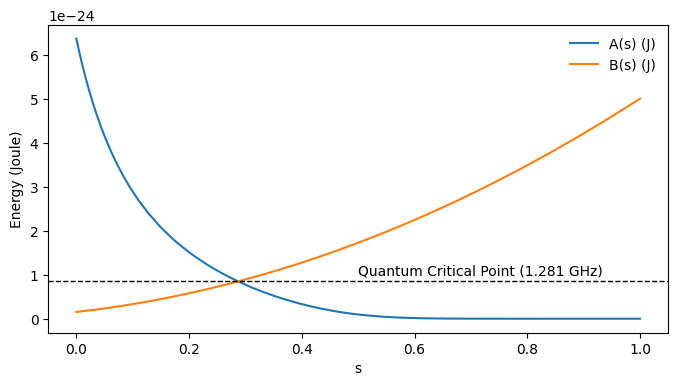

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

anneal_sc.plot(x='s', y=['A(s) (J)', 'B(s) (J)'], ax=ax)
plt.axhline(1.281 * factor, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Energy (Joule)')
plt.text(0.5,1.5*factor,'Quantum Critical Point (1.281 GHz)')
plt.legend(loc='best', frameon=False)
plt.savefig('annealing_schedule.pdf')

## Modelling a problem

Biases and couplings must be defined as python dictionaries.

In a common (english) dictionary you tipically have a collection of words, and for each word its definition:

> **dictionary**: a book or electronic resource that lists the words of a language and gives their meaning

In Python, a dictionary is a similar object that contains a collection of `items`, and each item has a `key` (the "name" of the item) and an `value` (the "meaning" of the item).

In [17]:
# example dictionary in python:
dictionary = {
    "key1": 10,       # item1
    "key2": 0.3,      # item2
    "key3": "value3", # item3
    4: "value4"       # item4
}
# keys can also be numbers

In our case we need to provide a bias to each qubit. Let's consider 3 qubits, `{0,1,2}`, I try giving bias $4.5$ to qubit `0`, bias $2$ to qubit `1` and bias $-6$ to qubit `2`.

In [18]:
# REMEMBER
# h range:  [-4.0, 4.0]
# meaning qubit -> value
h = {
    0: 4.5, ## not allowed
    1: 2,
    2: -6 ## not allowed
    }

As you can see the keys of the dictionary are the qubits, and the values are the biases.

In a similar fashion we define the couplings. This time the keys of the dictionary are the *edges* connecting the qubits! So we write `(x1, x2)` by denoting the edge (aka the coupling) connecting qubit `x1` with qubit `x2`.

Let's define also some random couplings.

In [19]:
# REMEMBER
# J range:  [-1.0, 1.0]

J ={
    (0,1): 1,
    (1,2): 0.2,
    (2,0): -1.2 ## not allowed
    }

As you can imagine these values are not allowed.

>&#9888;&#65039; **Attention:** It is good practise to always check if your problem can be submitted to the QPU.

Here is how you check it:

In [20]:
print(solver.check_problem(h,J))

False


##### **Exercise 2**
Define a problem with at least 4 qubits and check if that can be solved on the QPU

In [21]:
# h range:  [-4.0, 4.0]

h = {
    0: 4, 
    1: 2,
    2: -2,
    3: -1
    }

# J range:  [-1.0, 1.0]
J ={
    (0,1): 1,
    (1,2): 0.2,
    (2,3): -1,
    (3,0): 1,
    (3,1): 2
    }

# Let's see if you understood...
print(solver.check_problem(h,J))

False


RECAP: you need to pay attention to:
- missing qubits
- connectivity (are 2 qubits connected>)
- bias connectivity problems

No worries, DWave can take care of it for you!

## Run a problem on a Quantum Computer!

Now it is time to apply all we learnt so far.

Let's tackle the Ising problem introduced earlier.

##### **Exercise 3**
Define the biases and the couplers of the Ising problem with 5 spins on a (open) line

> &#128161; **Hint:** use the first qubits (i.e. 0,1,2...), we will see something interesting afterwords

In [35]:
h = {
    0: 3.5, 
    1: 3.5,
    2: 3.5,
    }
# or h = {}
# or h = {i:0 for i in range(3)}

# J range:  [-1.0, 1.0]
J ={
    (0,1): -1,
    (1,2): -1,
    (2,0): -1,
    }

In Section **Select a quantum machine** we defined a
`solver`. In order to solve our problem we need to define a `sampler` and the embedding (in our case is automatic with `EmbeddingComposite`).

Using `num_reads` we also say we want to try `1000` times to solve the problem..

Since our problem is formulated as an Ising problem, we call the `sample_ising` function in order to solve it.

Dictionaries `h` and `J` contain our problem definition.

In [36]:
from dwave.system import EmbeddingComposite, DWaveSampler
import dwave.inspector

sampler = EmbeddingComposite(DWaveSampler(solver=solver.id))
N_reads = 1000

response = sampler.sample_ising(h, J,
                                num_reads=N_reads,
                                label='My first quantum problem',
                                return_embedding=True,
                                #annealing_time=
                                )

dwave.inspector.show((h, J), response) # helps visualizing the embedding

Serving Inspector on http://127.0.0.1:18000/?problemId=91600f8e-22fb-42cf-afe0-72e52f3043a0

'http://127.0.0.1:18000/?problemId=91600f8e-22fb-42cf-afe0-72e52f3043a0'

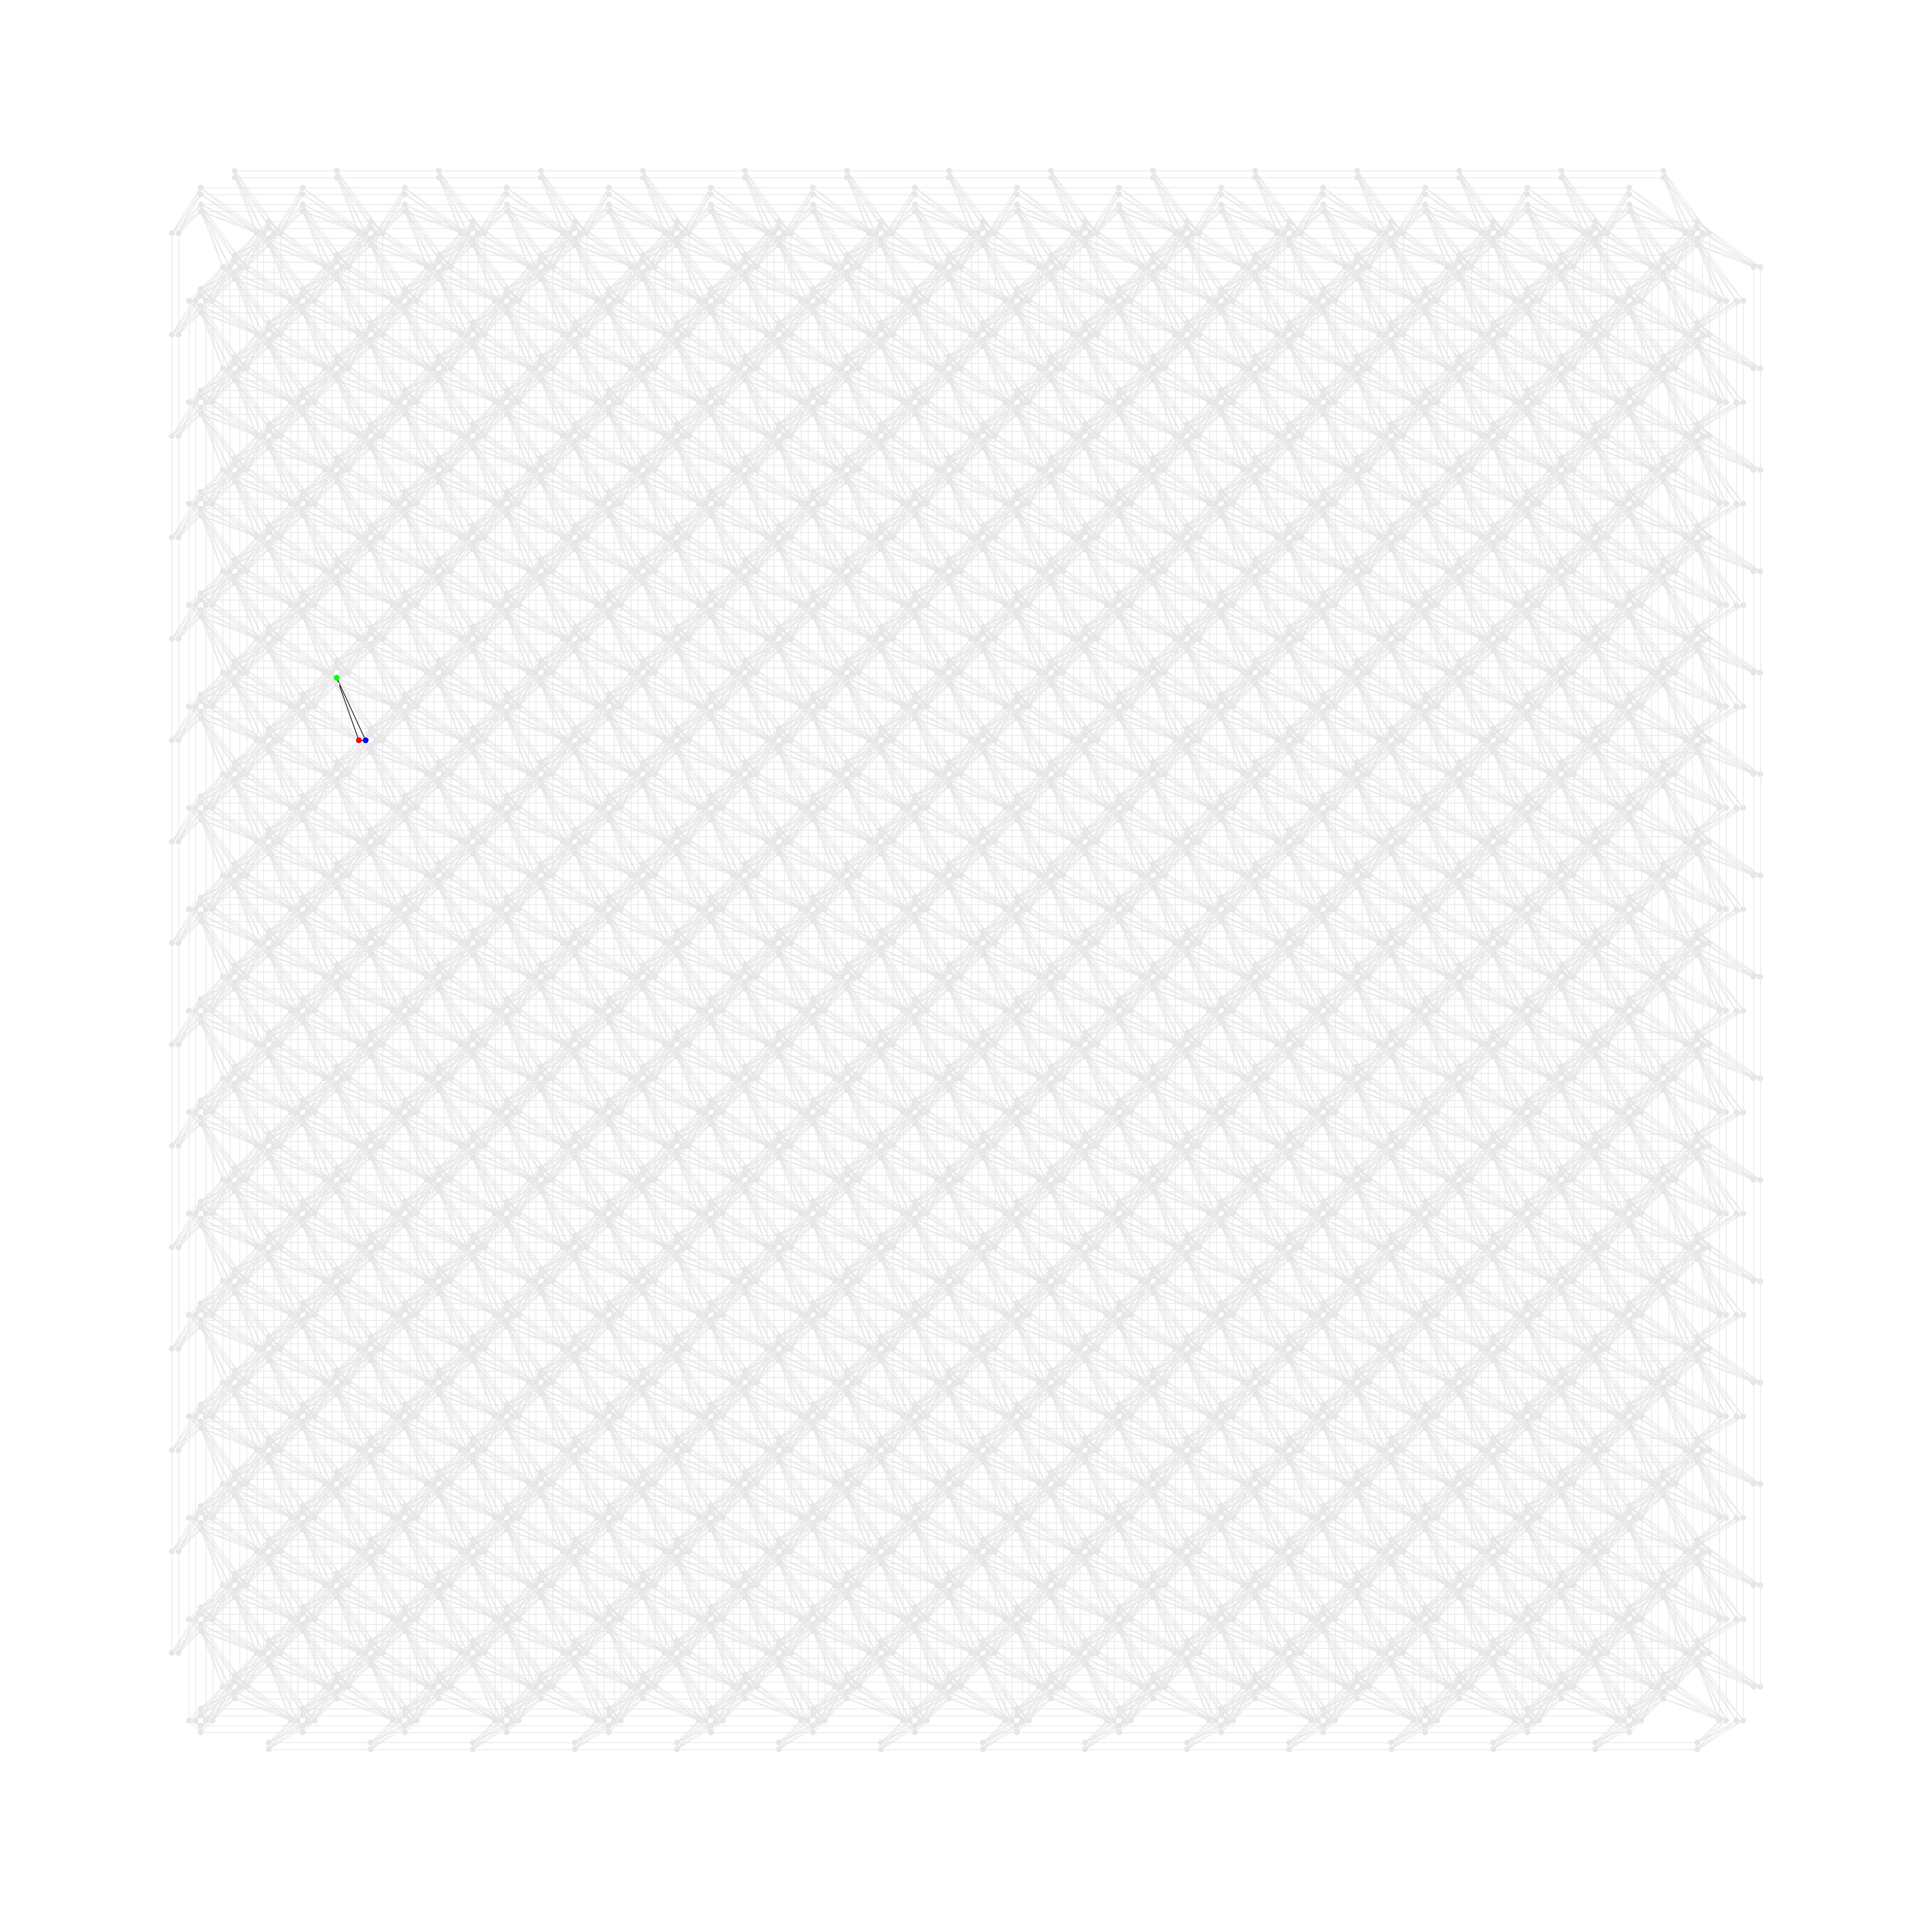

In [37]:
embedding = response.info['embedding_context']['embedding']
f, axes = plt.subplots(1, 1, figsize=(50,50))
X = dnx.pegasus_graph(16)
dnx.draw_pegasus_embedding(X, embedding, crosses=True, node_size=50, ax=axes)

Now go to the [Dashboard](https://cloud.dwavesys.com/leap/) and check your usage of quantum hardware!

## Quantum Results

Let's see what we got. We can see the unique solutions that the quantum computer was able to find by inspecting `response.data`.

In [38]:
for samp in response.data(['sample']):
  print(samp.sample)

{0: -1, 1: -1, 2: -1}


These were all the unique solutions. Hopefully the true solution(s) is(/are) the one(s) that came up more frequently.

>&#9888;&#65039; **Remember:** The soluton to the problem is the configuration corresponding to the lowest energy.

Let's see each configuration with its energy and (frequentist) probability of being the true solution.



In [39]:
import numpy as np
for conf, en, num in response.data(['sample','energy','num_occurrences']):
  print([conf[x] for x in conf])
  print('Energy=', en, '\tprob_res=',num*100/N_reads,'%\n')

[-1, -1, -1]
Energy= -13.5 	prob_res= 100.0 %



As we can see we have two possible solutions: the chain with all spins down and the chain with all spins up.

##### **Exercise 4**
What happens if we add biases to the problem, for example $h=1$? Try to guess how the solution to the problem changes and then submit the problem to the DWave quantum computer. Do you get what you expected?

##### **Exercise 5**
What happens if we close the line (connecting last qubit with first qubit) while $h=1$ and $J=1$?

Try to guess how the solution to the problem changes and then submit the problem to the DWave quantum computer. Do you get what you expected?

##### **Exercise 6**
Define a problem with a 2D grid of spins, for example $3\times3$, with square cells. Solve it with the quantum computer.